In [21]:
# number of images per class, training set is imbalanced
import os

dataset_path = '/Users/ih/Downloads/final project/OCT2017'
import pandas as pd

train_df = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Train Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Class', 'Test Count'])
summary_df = pd.merge(train_df, test_df, on='Class')
summary_df

,Class,Train Count,Test Count
0,CNV,37205,250
1,DME,11348,250
2,DRUSEN,8616,250
3,NORMAL,26315,250


In [22]:
print("Train Set Summary Statistics:")
print(train_df.describe())

print("Test Set Summary Statistics:")
print(test_df.describe())

Train Set Summary Statistics:
        Train Count
count      4.000000
mean   20871.000000
std    13382.939961
min     8616.000000
25%    10665.000000
50%    18831.500000
75%    29037.500000
max    37205.000000
Test Set Summary Statistics:
       Test Count
count         4.0
mean        250.0
std           0.0
min         250.0
25%         250.0
50%         250.0
75%         250.0
max         250.0


### Summary Statistics Interpretation ^

#### Train Set:
- The training set contains 4 classes: CNV, DME, DRUSEN, and NORMAL.
- The `mean` number of samples per class is approximately **20,871**, but the `std` (standard deviation) is quite high at **13,382**, telling us theres a significant **class imbalance**.
- The **smallest class**, DRUSEN, has **8,616** images, while the **largest class**, CNV, has **37,205**.
- This imbalance could negatively affect model performance, especially for underrepresented classes.

#### Test Set:
- The test set is **perfectly balanced**, with each class containing exactly **250 samples**.
- `std = 0` confirms there is **no variation** in sample counts across classes.
- A balanced test set is good for evaluating model performance fairly across all classes.

#### Conclusion:
- Special care should be taken during training to handle the imbalance in the training set, possibly through **data augmentation**, **class weighting**, or **resampling techniques**.


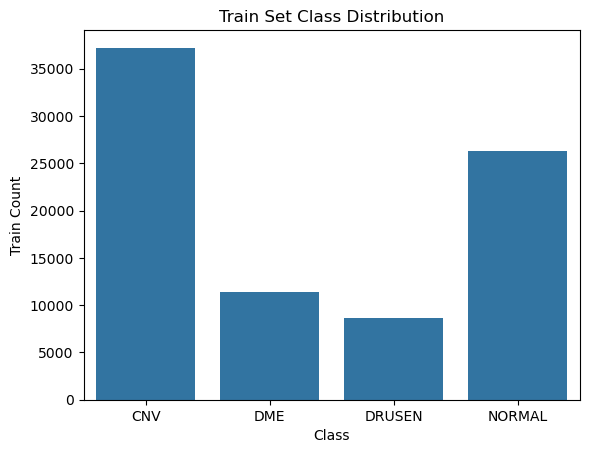

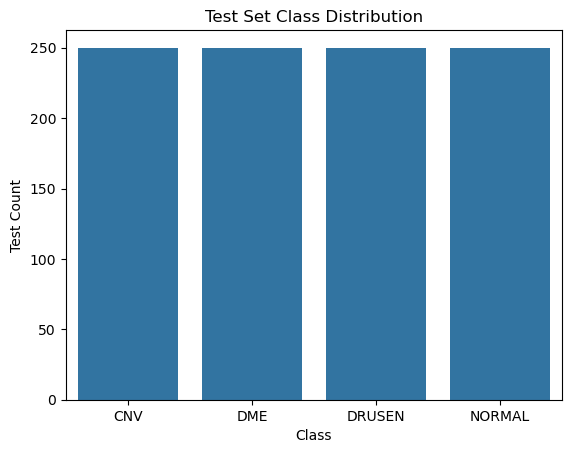

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=train_df, x='Class', y='Train Count')
plt.title('Train Set Class Distribution')
plt.show()

sns.barplot(data=test_df, x='Class', y='Test Count')
plt.title('Test Set Class Distribution')
plt.show()

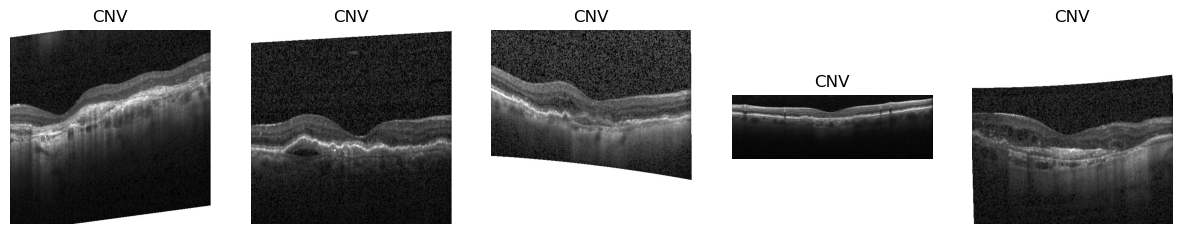

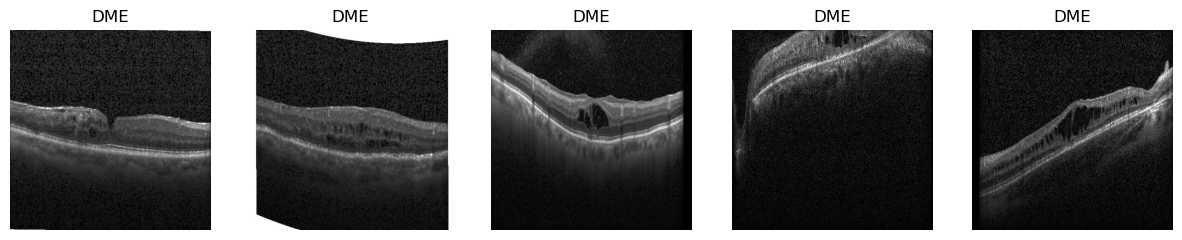

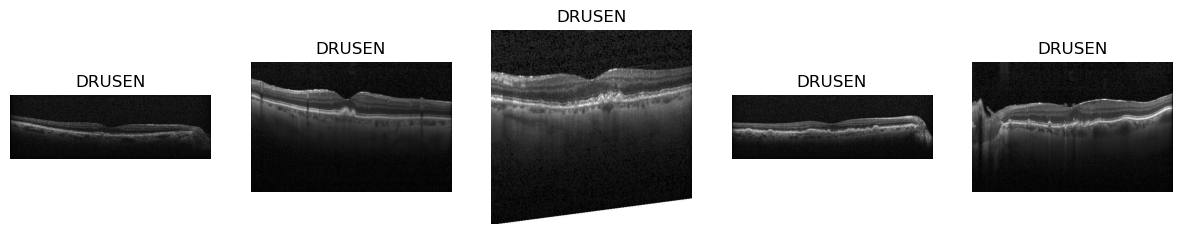

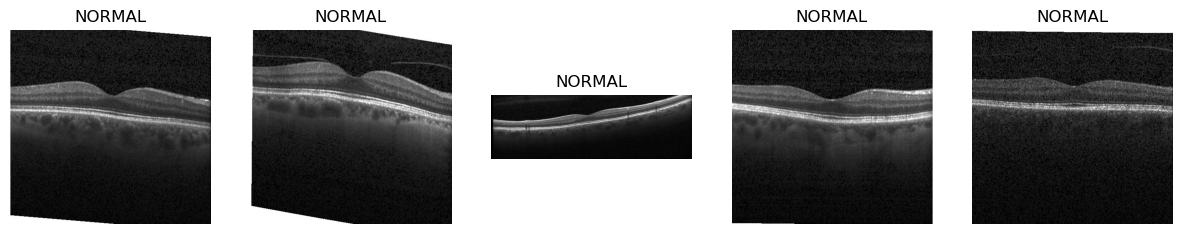

In [24]:
# Show 5 random images per class
import random
from PIL import Image

def show_samples(path, label, n=5):
    files = os.listdir(os.path.join(path, label))
    samples = random.sample(files, n)
    fig, axs = plt.subplots(1, n, figsize=(15, 4))
    for i, file in enumerate(samples):
        img = Image.open(os.path.join(path, label, file))
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(label)
    plt.show()

for label in os.listdir(os.path.join(dataset_path, 'train')):
    show_samples(os.path.join(dataset_path, 'train'), label)